In [1]:

"""

1 layer hidden nodes
process as sigmoid funtion

"""

import collections
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.colors

In [2]:
def process_data():
   "orginal script"
    #outputclasses
    raw_alpha = [(0,[0,0,0,0,1,0,0,0,0, 0,0,0,1,0,1,0,0,0, 0,0,1,0,0,0,1,0,0, 0,1,0,0,0,0,0,1,0, 1,1,1,1,1,1,1,1,1, 1,0,0,0,0,0,0,0,1, 1,0,0,0,0,0,0,0,1, 1,0,0,0,0,0,0,0,1, 1,0,0,0,0,0,0,0,1],1,'A',1,'A'),
                 (1,[1,1,1,1,1,1,1,1,0, 1,0,0,0,0,0,0,0,1, 1,0,0,0,0,0,0,0,1, 1,0,0,0,0,0,0,1,0, 1,1,1,1,1,1,1,0,0, 1,0,0,0,0,0,0,1,0, 1,0,0,0,0,0,0,0,1, 1,0,0,0,0,0,0,0,1, 1,1,1,1,1,1,1,1,0],2,'B',2,'B'),
                 (2,[1,1,1,1,1,1,1,1,1, 1,0,0,0,0,0,0,0,0, 1,0,0,0,0,0,0,0,0, 1,0,0,0,0,0,0,0,0, 1,0,0,0,0,0,0,0,0, 1,0,0,0,0,0,0,0,0, 1,0,0,0,0,0,0,0,0, 1,0,0,0,0,0,0,0,0, 1,1,1,1,1,1,1,1,1],3,'C',3,'C'),
                 (3,[1,1,1,1,1,1,1,1,0, 1,0,0,0,0,0,0,1,1, 1,0,0,0,0,0,0,0,1, 1,0,0,0,0,0,0,0,1, 1,0,0,0,0,0,0,0,1, 1,0,0,0,0,0,0,0,1, 1,0,0,0,0,0,0,0,1, 1,0,0,0,0,0,0,1,1, 1,1,1,1,1,1,1,1,0],4,'D',4,'O'),
                 (4,[1,1,1,1,1,1,1,1,1, 1,0,0,0,0,0,0,0,0, 1,0,0,0,0,0,0,0,0, 1,0,0,0,0,0,0,0,0, 1,1,1,1,1,1,1,1,1, 1,0,0,0,0,0,0,0,0, 1,0,0,0,0,0,0,0,0, 1,0,0,0,0,0,0,0,0, 1,1,1,1,1,1,1,1,1],5,'E',5,'E'),
                 (5,[1,1,1,1,1,1,1,1,1, 1,0,0,0,0,0,0,0,0, 1,0,0,0,0,0,0,0,0, 1,0,0,0,0,0,0,0,0, 1,1,1,1,1,1,1,1,1, 1,0,0,0,0,0,0,0,0, 1,0,0,0,0,0,0,0,0, 1,0,0,0,0,0,0,0,0, 1,0,0,0,0,0,0,0,0],6,'F',5,'E'),
                 (6,[1,1,1,1,1,1,1,1,1, 1,0,0,0,0,0,0,0,0, 1,0,0,0,0,0,0,0,0, 1,0,0,0,0,0,0,0,0, 1,0,0,0,0,0,0,0,0, 1,0,0,0,0,0,1,1,1, 1,0,0,0,0,0,0,0,1, 1,0,0,0,0,0,0,0,1, 1,1,1,1,1,1,1,1,1],7,'G',3,'C'),
                 (7,[1,0,0,0,0,0,0,0,1, 1,0,0,0,0,0,0,0,1, 1,0,0,0,0,0,0,0,1, 1,0,0,0,0,0,0,0,1, 1,1,1,1,1,1,1,1,1, 1,0,0,0,0,0,0,0,1, 1,0,0,0,0,0,0,0,1, 1,0,0,0,0,0,0,0,1, 1,0,0,0,0,0,0,0,1],8,'H',1,'A'),
                 (8,[0,0,1,1,1,1,1,0,0, 0,0,0,0,1,0,0,0,0, 0,0,0,0,1,0,0,0,0, 0,0,0,0,1,0,0,0,0, 0,0,0,0,1,0,0,0,0, 0,0,0,0,1,0,0,0,0, 0,0,0,0,1,0,0,0,0, 0,0,0,0,1,0,0,0,0, 0,0,1,1,1,1,1,0,0],9,'I',6,'I'),
                 (9,[0,0,0,0,0,0,0,1,0, 0,0,0,0,0,0,0,1,0, 0,0,0,0,0,0,0,1,0, 0,0,0,0,0,0,0,1,0, 0,0,0,0,0,0,0,1,0, 0,1,0,0,0,0,0,1,0, 0,1,0,0,0,0,0,1,0, 0,0,1,0,0,0,1,0,0, 0,0,0,1,1,1,0,0,0],10,'J',6,'I'),
                 (10,[1,0,0,0,0,0,1,0,0, 1,0,0,0,0,1,0,0,0, 1,0,0,0,1,0,0,0,0, 1,0,0,1,0,0,0,0,0, 1,1,1,0,0,0,0,0,0, 1,0,0,1,0,0,0,0,0, 1,0,0,0,1,0,0,0,0, 1,0,0,0,0,1,0,0,0, 1,0,0,0,0,0,1,0,0],11,'K',7,'K'),
                 (11,[1,0,0,0,0,0,0,0,0, 1,0,0,0,0,0,0,0,0, 1,0,0,0,0,0,0,0,0, 1,0,0,0,0,0,0,0,0, 1,0,0,0,0,0,0,0,0, 1,0,0,0,0,0,0,0,0, 1,0,0,0,0,0,0,0,0, 1,0,0,0,0,0,0,0,0, 1,1,1,1,1,1,1,1,1],12,'L',8,'L'),
                 (12,[1,0,0,0,0,0,0,0,1, 1,1,0,0,0,0,0,1,1, 1,1,0,0,0,0,0,1,1, 1,0,1,0,0,0,1,0,1, 1,0,1,0,0,0,1,0,1, 1,0,0,1,0,1,0,0,1, 1,0,0,1,0,1,0,0,1, 1,1,0,0,1,0,0,0,1, 1,0,0,0,1,0,0,0,1],13,'M',9,'M'),
                 (13,[1,0,0,0,0,0,0,0,1, 1,1,0,0,0,0,0,0,1, 1,0,1,0,0,0,0,0,1, 1,0,0,1,0,0,0,0,1, 1,0,0,0,1,0,0,0,1, 1,0,0,0,0,1,0,0,1, 1,0,0,0,0,0,1,0,1, 1,0,0,0,0,0,0,1,1, 1,0,0,0,0,0,0,0,1],14,'N',9,'M'),
                 (14,[0,1,1,1,1,1,1,1,0, 1,1,0,0,0,0,0,1,1, 1,0,0,0,0,0,0,0,1, 1,0,0,0,0,0,0,0,1, 1,0,0,0,0,0,0,0,1, 1,0,0,0,0,0,0,0,1, 1,0,0,0,0,0,0,0,1, 1,0,0,0,0,0,0,0,1, 0,1,1,1,1,1,1,1,0],15,'O',4,'O'),
                 (15,[1,1,1,1,1,1,1,1,1, 1,0,0,0,0,0,0,0,1, 1,0,0,0,0,0,0,0,1, 1,0,0,0,0,0,0,0,1, 1,1,1,1,1,1,1,1,1, 1,0,0,0,0,0,0,0,0, 1,0,0,0,0,0,0,0,0, 1,0,0,0,0,0,0,0,0, 1,0,0,0,0,0,0,0,0],15,'P',1,'B'),
                 (16,[1,1,1,1,1,1,1,1,1, 1,0,0,0,0,0,0,0,1, 1,0,0,0,0,0,0,0,1, 1,0,0,0,0,0,0,0,1, 1,0,0,0,0,0,0,0,1, 1,0,0,0,0,1,0,0,1, 1,0,0,0,0,0,1,0,1, 1,0,0,0,0,0,0,1,1, 1,1,1,1,1,1,1,1,1],17,'Q',3,'O'),
                 (17,[1,1,1,1,1,1,1,1,1, 1,0,0,0,0,0,0,0,1, 1,0,0,0,0,0,0,0,1, 1,0,0,0,0,0,0,0,1, 1,1,1,1,1,1,1,1,1, 1,0,0,0,0,1,0,0,0, 1,0,0,0,0,0,1,0,0, 1,0,0,0,0,0,0,1,0, 1,0,0,0,0,0,0,0,1],15,'R',1,'B'),
                 (18,[1,1,1,1,1,1,1,1,1, 1,0,0,0,0,0,0,0,0, 1,0,0,0,0,0,0,0,0, 1,0,0,0,0,0,0,0,0, 1,1,1,1,1,1,1,1,1, 0,0,0,0,0,0,0,0,1, 0,0,0,0,0,0,0,0,1, 0,0,0,0,0,0,0,0,1, 1,1,1,1,1,1,1,1,1],19,'S',5,'E'),
                 (19,[0,1,1,1,1,1,1,1,0, 0,0,0,0,1,0,0,0,0, 0,0,0,0,1,0,0,0,0, 0,0,0,0,1,0,0,0,0, 0,0,0,0,1,0,0,0,0, 0,0,0,0,1,0,0,0,0, 0,0,0,0,1,0,0,0,0, 0,0,0,0,1,0,0,0,0, 0,0,0,0,1,0,0,0,0],20,'T',6,'I'),
                 (20,[1,1,0,0,0,0,0,1,1, 1,1,0,0,0,0,0,1,1, 1,1,0,0,0,0,0,1,1, 1,1,0,0,0,0,0,1,1, 1,1,0,0,0,0,0,1,1, 1,1,0,0,0,0,0,1,1, 1,1,0,0,0,0,0,1,1, 0,1,1,0,0,0,1,1,0, 0,0,1,1,1,1,1,0,0],21,'U',8,'L'),
                 (21,[1,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,1,1,0,0,0,1,0,0,0,1,1,0,0,1,0,1,0,0,1,1,0,1,0,0,0,1,0,1,0,1,0,0,0,0,0,1,0],23,'W'),
                 (22,[1,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,1],24,'X'),
                 (23,[1,1,1,1,1,1,1,1,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,1,1,1,1,1,1,1,1,],26,'Z')]

    #for hcoding
    indices = []

    # training array
    training_data = np.zeros((len(raw_alpha), 81))

    # labels
    letters = []

    # iterate
    for i in raw_alpha:
        indices.extend([i[0]])
        training_data[i[0]] = i[1]
        letters.extend([i[3]])

    # encode
    indices_array = np.array(indices)
    labels = np.zeros((24, 24))
    labels[np.arange(24), indices_array] = 1

    return labels, training_data, letters

In [3]:
class NeuralNet:
   

    def __init__(self, size, alpha=1, seed=9798, fit=None):
        # Check input types
        if not isinstance(alpha, (int, float)):
            raise TypeError("alpha (steepness) must be type int or float")
        if not isinstance(size, (tuple)):
            raise TypeError("size must be a tuple of size 3")
        if not isinstance(seed, (int)):
            raise TypeError("seed must be an integer")

        if not len(size) == 3:
            raise ValueError("size must be a tuple of size 3")

        self.size = size
        self.alpha = alpha
        np.random.seed(seed)
        self.fit = fit

    def sigmoid_transfer(self, net_sum):
     
        return 1 / (1 + np.exp(-net_sum * self.alpha))

    def initial_weights(self):
        """Randomly assigns initial weights [-1, 1)

        Returns:
            list of initial weight arrays

        """
        input_to_hidden = np.random.uniform(-1, 1,
                                            (self.size[1], self.size[0]))
        hidden_to_output = np.random.uniform(-1, 1,
                                             (self.size[2], self.size[1]))
        return [input_to_hidden, hidden_to_output]

    def initial_biases(self):
        """Randomly assigns initial biases [-1, 1)

        Returns:
            list of initial weight arrays

        """
        input_to_hidden = np.random.uniform(-1, 1, self.size[1])
        hidden_to_output = np.random.uniform(-1, 1, self.size[2])
        return [input_to_hidden, hidden_to_output]

    def forward_pass(self, case_input, weights=None, biases=None):
        if weights is None:
            weights = self.initial_weights()
        if biases is None:
            biases = self.initial_biases()

        # Check input types
        if not isinstance(case_input, np.ndarray):
            raise TypeError("case_input must be an array")
        if not isinstance(weights[0], np.ndarray):
            raise TypeError("weights must be a list of arrays")
        if not isinstance(biases[0], np.ndarray):
            raise TypeError("biases must be a list of arrays")

        # Calculate the summed input to the hidden layer
        net0 = np.matmul(case_input, np.transpose(weights[0])) + biases[0]

        # Apply sigmoid transfer function
        out0 = self.sigmoid_transfer(net0)

        # Calculate the summed input to the output layer
        net1 = np.matmul(out0, np.transpose(weights[1])) + biases[1]

        # Apply sigmoid transfer function
        out1 = self.sigmoid_transfer(net1)

        # Apply basic credit assignment to the pixels
        credit = case_input * weights[0]

        # Store results
        forpass = collections.namedtuple('ForwardPass',
                                         ['case_input', 'size', 'alpha',
                                          'weights', 'biases', 'net0', 'out0',
                                          'net1', 'out1', 'credit'])

        self.fit = forpass(case_input, self.size, self.alpha, weights, biases,
                           net0, out0, net1, out1, credit)

        return self

    def sse_eval(self, target):

        # Check input type
        if not isinstance(target, np.ndarray):
            raise TypeError("target must be an array")

        sse = np.sum((target - self.fit.out1)**2)

        return sse

    def backpropagation(self, target, eta=0.5):



        # Check if eta is a number
        if not isinstance(eta, (int, float)):
            raise TypeError("eta (learning rate) must be type int or float")

        if eta <= 0 or eta > 1:
            raise ValueError("eta (learning rate) must be bounded (0, 1]")

        # Working backwards so delta0 is array of deltas closest to output layer
        delta0 = -self.alpha*(target - self.fit.out1)*self.fit.out1*(1 - self.fit.out1)

        # Adjusted weights from hidden to output layer
        weights0 = self.fit.weights[1] - eta*np.outer(delta0, self.fit.out0)

        # Adjust bias from hidden to output layer
        biases0 = self.fit.biases[1] - eta*delta0

        # Working backwards so delta1 is array of deltas closest to input layer
        summation = np.sum(np.transpose(self.fit.weights[1])*delta0, axis=1)
        delta1 = summation*self.fit.out0*(1 - self.fit.out0)*self.alpha

        # Adjusted weights from input to hidden layer
        weights1 = self.fit.weights[0] - eta*np.outer(delta1, self.fit.case_input)

        # Adjust bias from input to hidden layer
        biases1 = self.fit.biases[0] - eta*delta1

        # Create a new weights array containing all weights
        weights_new = [weights1, weights0]

        # Create a new biases array containing all biases
        biases_new = [biases1, biases0]

        # Revise the fit with the new weights and biases
        self.forward_pass(self.fit.case_input, weights=weights_new,
                          biases=biases_new)

        return self

    def train(self, data_set, target, eta=0.5, epsilon=0.05, iterations=5000, verbose=True):




        # Check if epsilon a float
        if not isinstance(epsilon, float):
            raise TypeError("epsilon (learning rate) must be type float")

        # Check iterations value
        if iterations <= 0:
            raise ValueError("number of iterations must be greater than 0")

        # Calculate a baseline SSE (random for each)
        sse = 0
        for i in range(0, data_set.shape[0]):
            data_single = data_set[i]
            target_single = target[i]
            self.forward_pass(data_single)
            sse += self.sse_eval(target_single)

        if verbose:
            print("Training Model")
            print("\nInput:")
            print(data_set)
            print("\nTarget:")
            print(target)
            print("\n Total SSE by Iteration")
            print(f"\n{0:4}. {sse:.4f}")

        # Train over the specified number of iterations
        for iteration_num in range(1, iterations+1):
            # Perform backpropagation for each training record
            shuffle = np.random.choice(data_set.shape[0], data_set.shape[0],
                                       replace=False)
            for i in shuffle:
                data_single = data_set[i]
                target_single = target[i]
                self.forward_pass(data_single, weights=self.fit.weights,
                                  biases=self.fit.biases)
                self.backpropagation(target_single, eta=eta)

            # Calculate total SSE for the iteration
            sse = 0
            for i in range(0, data_set.shape[0]):
                data_single = data_set[i]
                target_single = target[i]
                self.forward_pass(data_single, weights=self.fit.weights,
                                  biases=self.fit.biases)
                sse += self.sse_eval(target_single)
            if verbose and iteration_num % 100 == 0:
                print(f"{iteration_num:4}. {sse:.4f}")

            # Enable early stopping past the threshold set
            if sse <= epsilon or iteration_num == iterations:
                if verbose:
                    for i in range(0, data_set.shape[0]):
                        data_single = data_set[i]
                        target_single = target[i]
                        self.forward_pass(data_single, weights=self.fit.weights,
                                          biases=self.fit.biases)
                        print("\n------------")
                        print("\nInput array:")
                        print(self.fit.case_input)
                        print("\nTarget array")
                        print(target_single)
                        print("\nHidden Layer Output:")
                        print(self.fit.out0)
                        print("\nOutput Layer Final Output:")
                        print(self.fit.out1)
                break

        return self

In [4]:
def display_letter(case_input_single):
    

    # Dimension assuming square
    img_size = np.sqrt(case_input_single.shape[0]).astype(int)

    # Reshape assumping square
    img = case_input_single.reshape(img_size, img_size)

    # Select white background with blue letters
    colors = np.array([[1, 1, 1],
                       [0, 0, 1]])
    cmap = matplotlib.colors.ListedColormap(colors)

    # Show image
    plt.imshow(img, cmap=cmap)
    plt.show()

In [5]:
def display_influence(case_input_single, model):
   

    # Dimension assuming square
    img_size = np.sqrt(case_input_single.shape[0]).astype(int)

    # Reshape assumping square
    img = case_input_single.reshape(img_size, img_size)

    # Select white background with gray letters
    colors = np.array([[1, 1, 1],
                       [0.9, 0.9, 0.9]])

    cmap = matplotlib.colors.ListedColormap(colors)

    # Get correct instance
    forpass = NeuralNet(model.size).forward_pass(case_input_single,
                                                 weights=model.fit.weights,
                                                 biases=model.fit.biases)

    # Normalize for uniform colors
    credit = (forpass.fit.credit - forpass.fit.credit.min()) / (forpass.fit.credit.max() - forpass.fit.credit.min())

    # Loop through nodes
    for i in range(0, credit.shape[0]):

        print(f"\nActivation = {forpass.fit.out0[i]:.4f}")

        # Show image
        plt.imshow(img, cmap=cmap)

        # Plot another layer showing infuence values
        influence = credit[i].reshape(img_size, img_size)

        im2 = plt.imshow(influence, vmin=0, vmax=1,
                         cmap=plt.cm.coolwarm, alpha=.5, interpolation='bilinear',)
        plt.show()


In [6]:
def display_node(data_set, model, node_num):
   
    # Select white background with gray letters
    colors = np.array([[1, 1, 1],
                       [0.9, 0.9, 0.9]])
    cmap = matplotlib.colors.ListedColormap(colors)

    # Initialize the activation and influence (input*weight)
    activation = []
    inf_raw = np.zeros(data_set.shape)

    # Loop through the data set
    for i in range(0, data_set.shape[0]):

        # Get correct instance
        forpass = NeuralNet(model.fit.size).forward_pass(data_set[i],
                                                         weights=model.fit.weights,
                                                         biases=model.fit.biases)

        # Keep the activation and influence for that node
        activation.extend([forpass.fit.out0[node_num]])
        inf_raw[i] = forpass.fit.credit[node_num]

    # Normalize for color range
    credit = (inf_raw - inf_raw.min()) / (inf_raw.max() - inf_raw.min())

    # Dimension assuming square
    img_size = np.sqrt(data_set[i].shape[0]).astype(int)

    # Reshape assumping square
    img = forpass.fit.weights[0][node_num].reshape(img_size, img_size)

    # Plot weights for the selected node
    imw = plt.imshow(img, cmap=plt.cm.coolwarm, alpha=.7, interpolation='bilinear')
    print(f"Weights for Node {node_num}")
    plt.show()

    # Loop through the data set
    for i in range(0, data_set.shape[0]):

        print(f"Activation = {activation[i]:.4f}")

        # Reshape assumping square
        img = data_set[i].reshape(img_size, img_size)

        # Show image
        plt.imshow(img, cmap=cmap)

        # Plot another layer showing infuence values
        influence = credit[i].reshape(img_size, img_size)

        im2 = plt.imshow(influence, vmin=0, vmax=1,
                         cmap=plt.cm.coolwarm, alpha=.5, interpolation='bilinear')
        plt.show()


In [7]:
def hidden_activations(data_set, letters, model):
    

    # Dictionary that will store dataframe input
    hidden_activations = {}

    for i in range(0, data_set.shape[0]):

        # Get correct instance
        forpass = NeuralNet(model.fit.size).forward_pass(data_set[i],
                                                         weights=model.fit.weights,
                                                         biases=model.fit.biases)


        hidden_activations[letters[i]] = forpass.fit.out0.tolist()

    return pd.DataFrame.from_dict(hidden_activations)

In [9]:
def display_all(case_input):
   

    for i in range(0, case_input.shape[0]):
        display_letter(case_input[i])


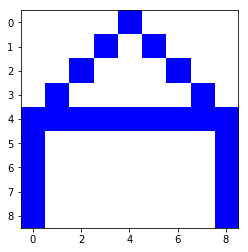

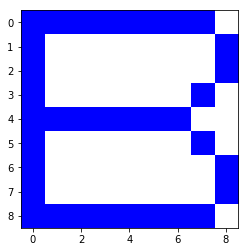

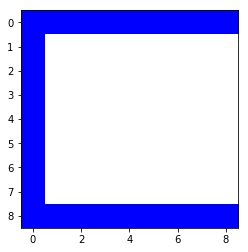

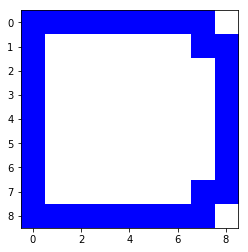

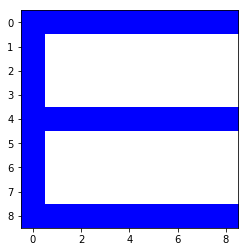

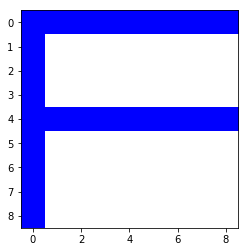

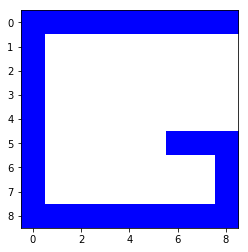

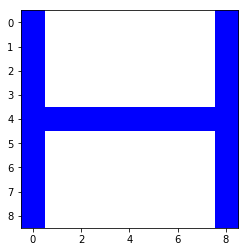

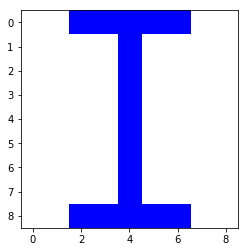

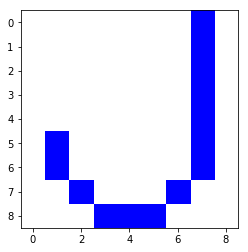

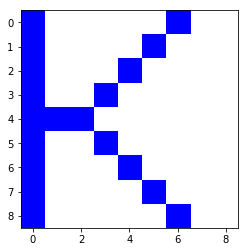

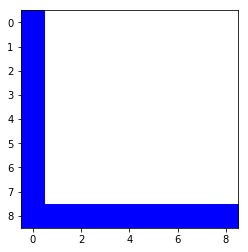

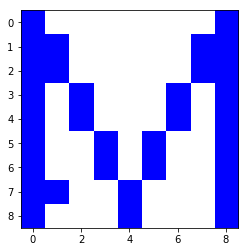

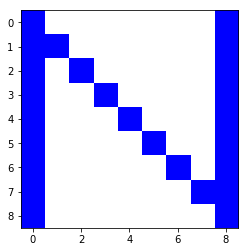

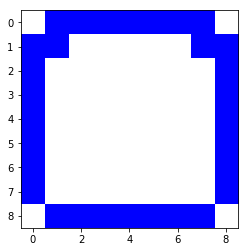

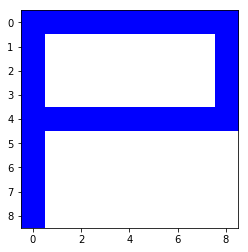

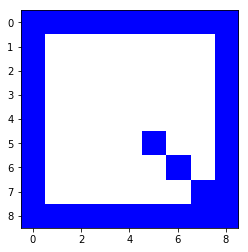

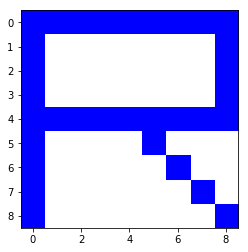

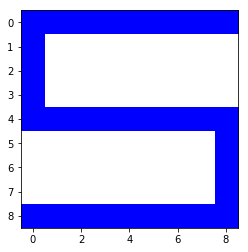

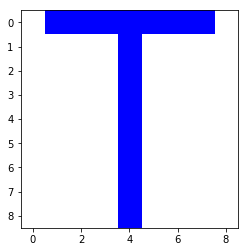

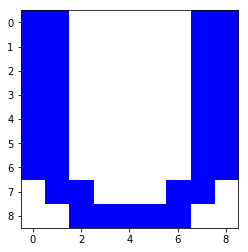

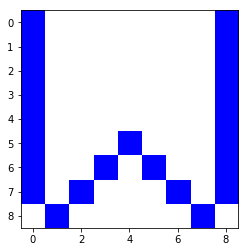

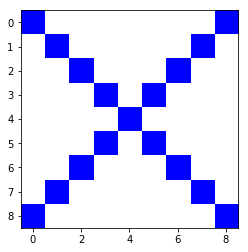

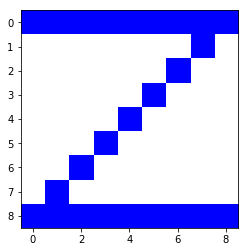

Training Model

Input:
[[0. 0. 0. ... 0. 0. 1.]
 [1. 1. 1. ... 1. 1. 0.]
 [1. 1. 1. ... 1. 1. 1.]
 ...
 [1. 0. 0. ... 0. 1. 0.]
 [1. 0. 0. ... 0. 0. 1.]
 [1. 1. 1. ... 1. 1. 1.]]

Target:
[[1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 

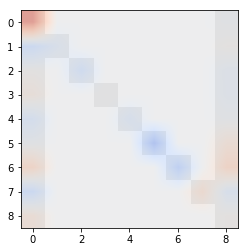


Activation = 1.0000


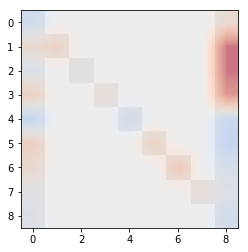


Activation = 0.2342


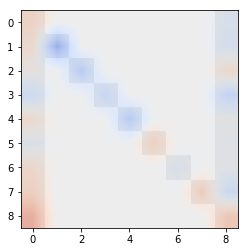


Activation = 0.0093


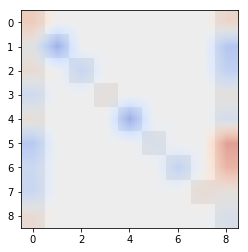


Activation = 0.0007


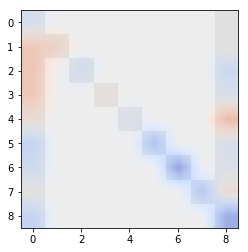


Activation = 0.0000


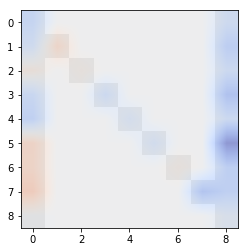


Activation = 0.9937


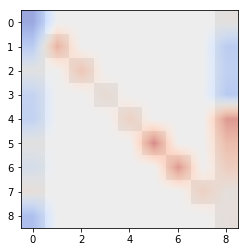


Activation = 0.0115


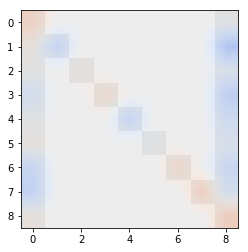

Weights for Node 0


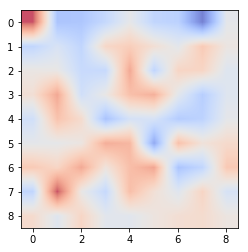

Activation = 0.5524


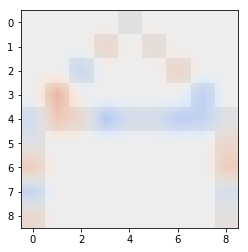

Activation = 0.0026


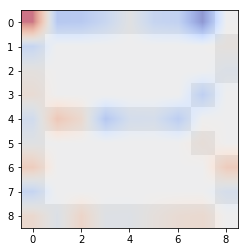

Activation = 0.0229


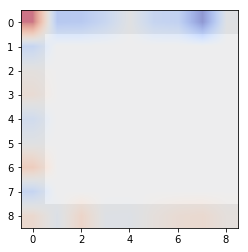

Activation = 0.1598


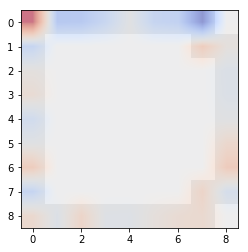

Activation = 0.0015


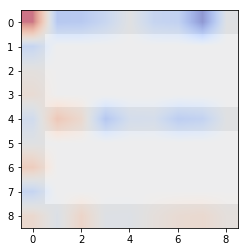

Activation = 0.0004


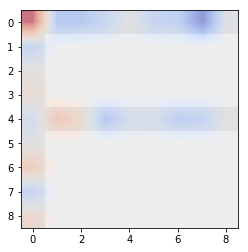

Activation = 0.1964


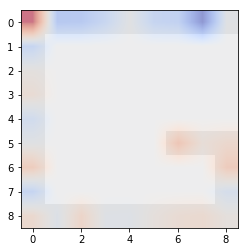

Activation = 0.6526


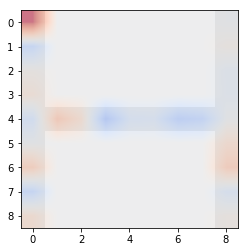

Activation = 0.9838


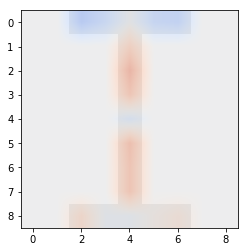

Activation = 0.0729


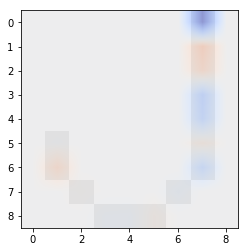

Activation = 0.9997


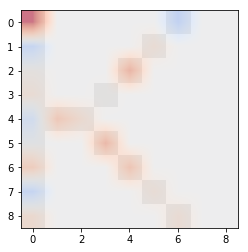

Activation = 0.9797


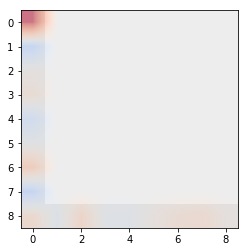

Activation = 0.9997


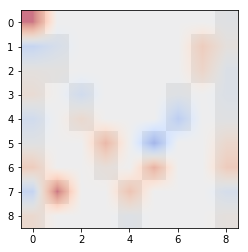

Activation = 0.3566


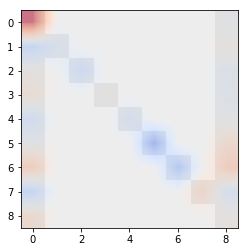

Activation = 0.0037


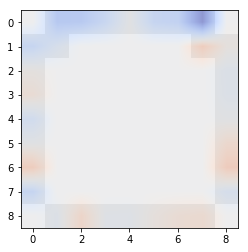

Activation = 0.0003


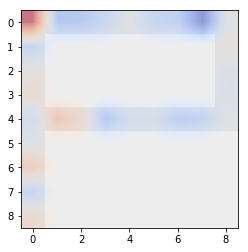

Activation = 0.0038


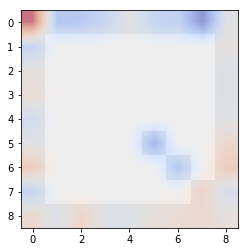

Activation = 0.0000


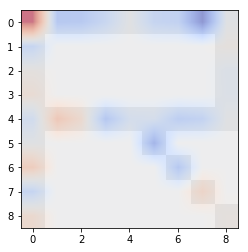

Activation = 0.0043


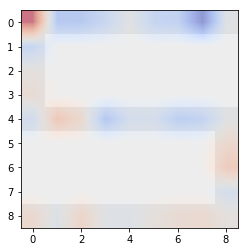

Activation = 0.3480


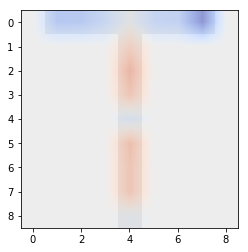

Activation = 0.9969


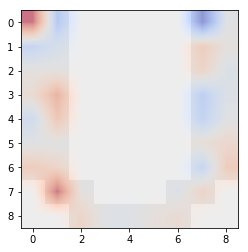

Activation = 0.9970


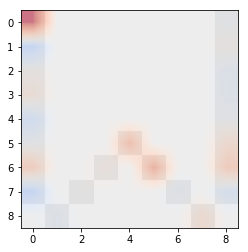

Activation = 0.9997


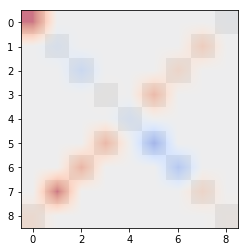

Activation = 0.9934


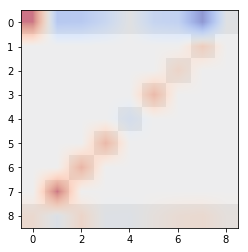

Weights for Node 1


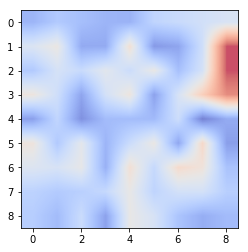

Activation = 0.0013


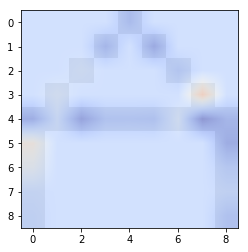

Activation = 0.9955


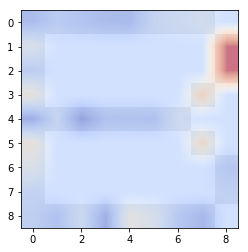

Activation = 0.3289


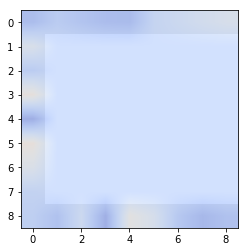

Activation = 0.9986


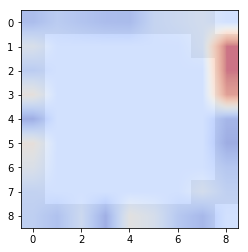

Activation = 0.0032


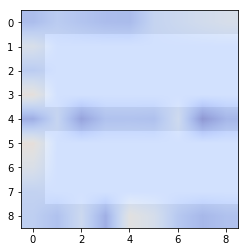

Activation = 0.0197


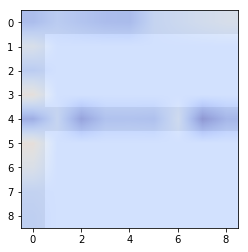

Activation = 0.1285


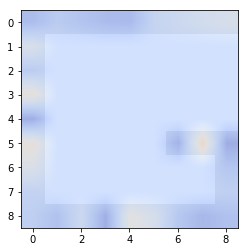

Activation = 0.9899


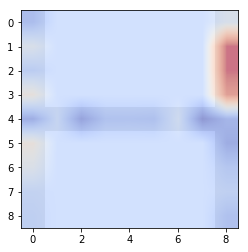

Activation = 0.9782


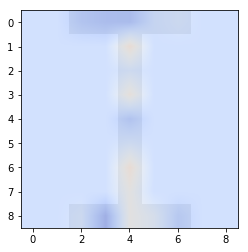

Activation = 0.9965


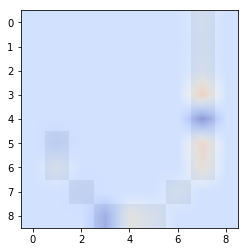

Activation = 0.6824


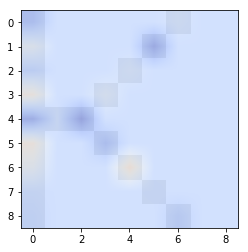

Activation = 0.6214


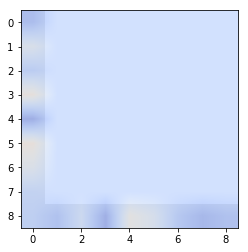

Activation = 1.0000


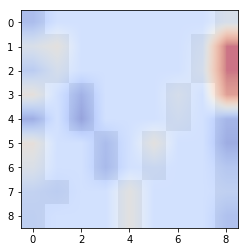

Activation = 1.0000


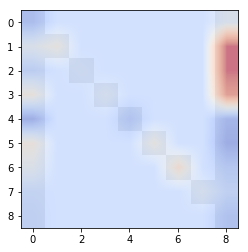

Activation = 0.9996


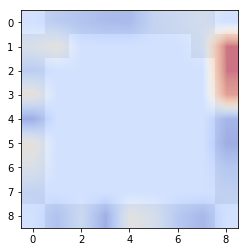

Activation = 0.9938


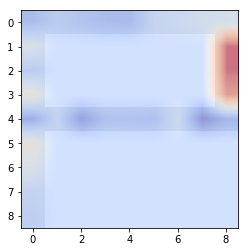

Activation = 0.9998


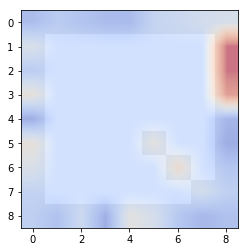

Activation = 0.9992


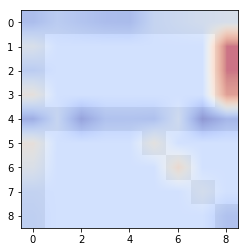

Activation = 0.0001


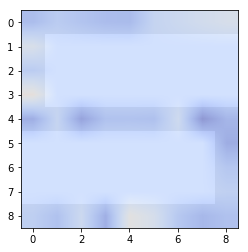

Activation = 0.9904


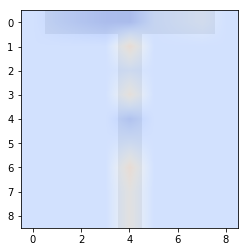

Activation = 1.0000


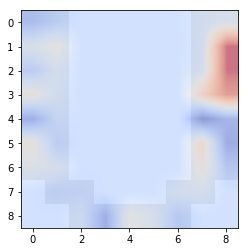

Activation = 0.9996


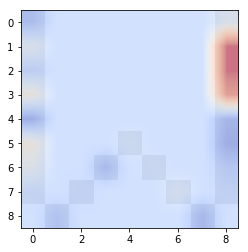

Activation = 0.9332


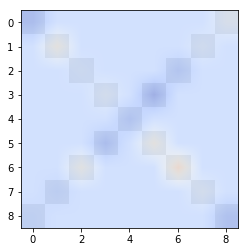

Activation = 0.0125


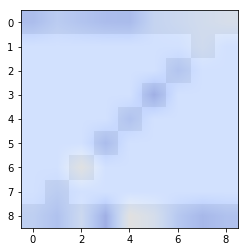

Weights for Node 2


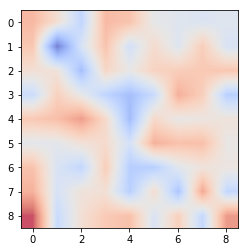

Activation = 0.9985


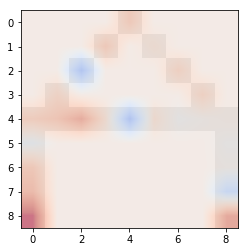

Activation = 0.9960


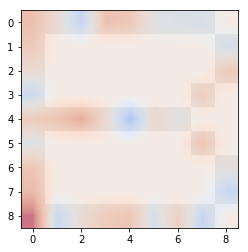

Activation = 0.9935


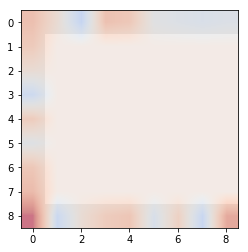

Activation = 0.9744


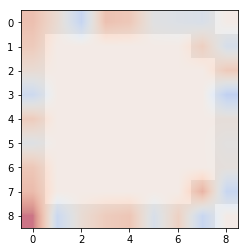

Activation = 0.9975


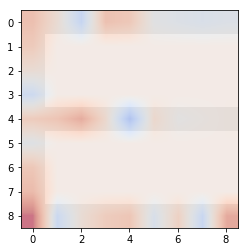

Activation = 0.9922


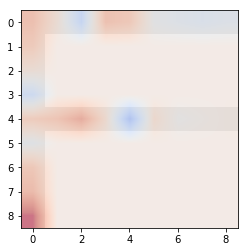

Activation = 0.9958


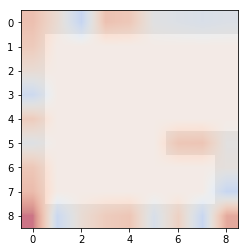

Activation = 0.9871


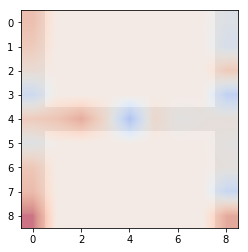

Activation = 0.0031


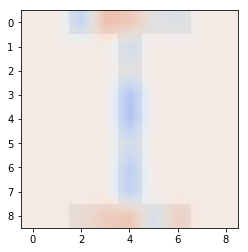

Activation = 0.5377


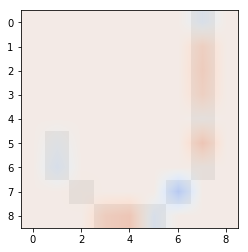

Activation = 0.9939


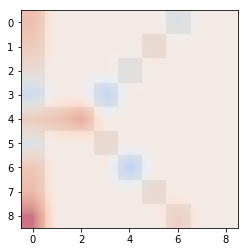

Activation = 0.9965


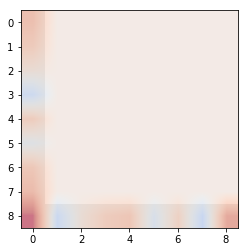

Activation = 0.9807


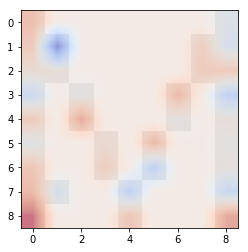

Activation = 0.2342


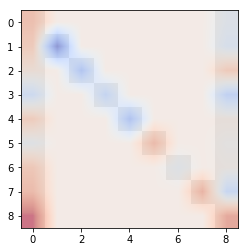

Activation = 0.0462


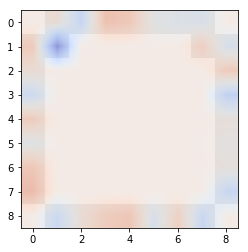

Activation = 0.9795


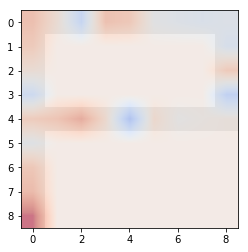

Activation = 0.9919


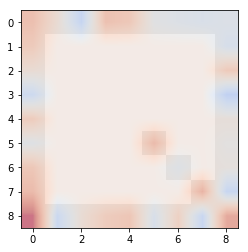

Activation = 0.9992


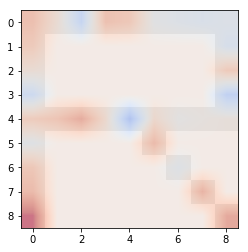

Activation = 0.9660


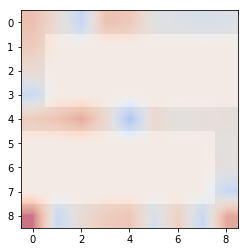

Activation = 0.0011


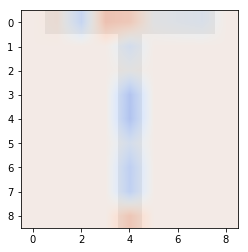

Activation = 0.7006


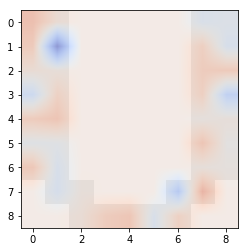

Activation = 0.0126


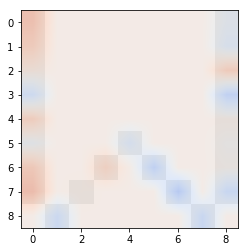

Activation = 0.0992


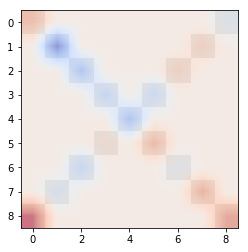

Activation = 0.5900


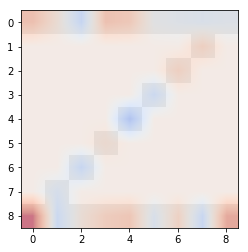

Weights for Node 3


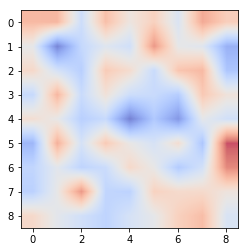

Activation = 0.2976


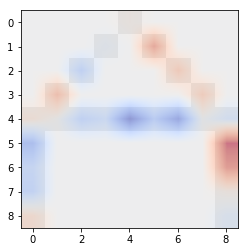

Activation = 0.0076


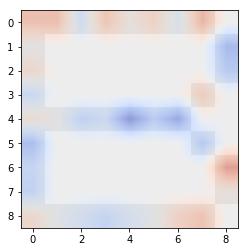

Activation = 0.9843


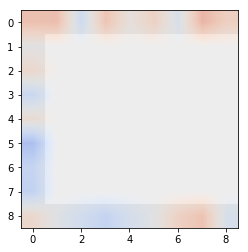

Activation = 0.9955


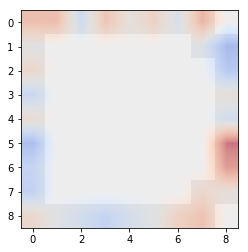

Activation = 0.0197


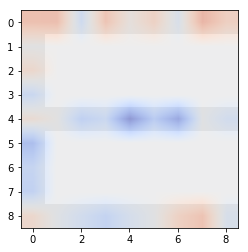

Activation = 0.0326


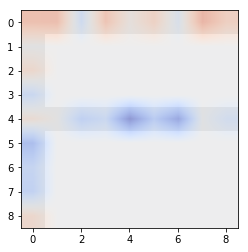

Activation = 0.9996


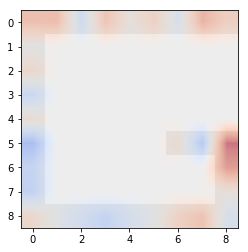

Activation = 0.0038


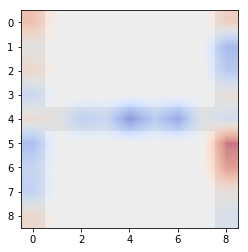

Activation = 0.1204


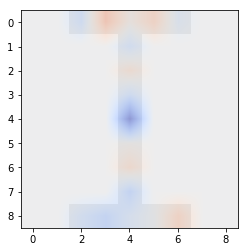

Activation = 0.9950


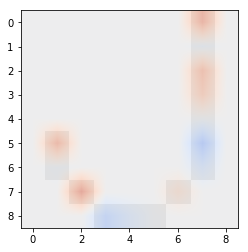

Activation = 0.9829


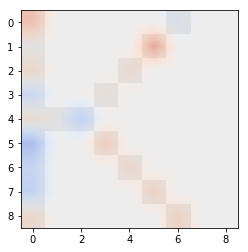

Activation = 0.4130


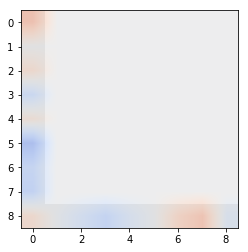

Activation = 0.0018


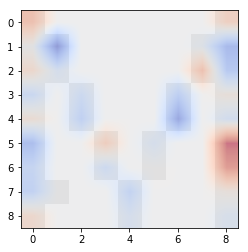

Activation = 0.0093


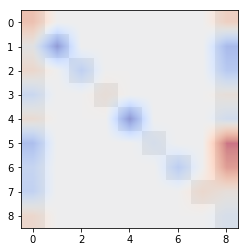

Activation = 0.6928


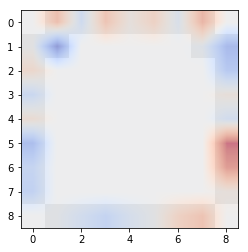

Activation = 0.0024


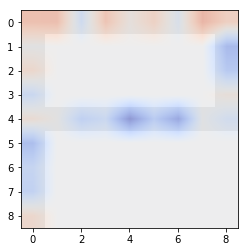

Activation = 0.9887


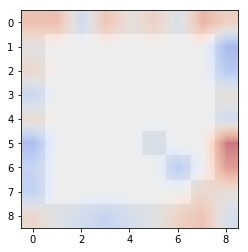

Activation = 0.0006


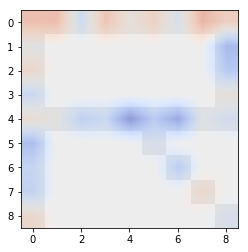

Activation = 0.9825


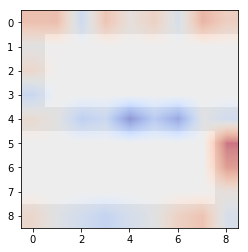

Activation = 0.8108


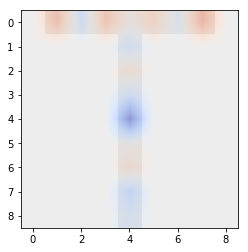

Activation = 0.9985


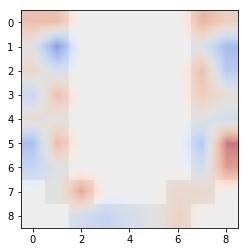

Activation = 0.9875


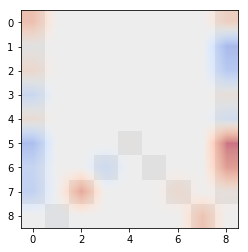

Activation = 0.0598


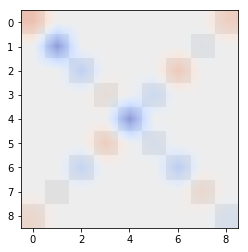

Activation = 0.9932


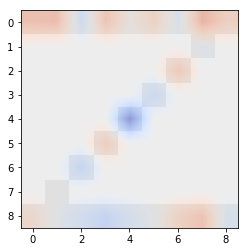

Weights for Node 4


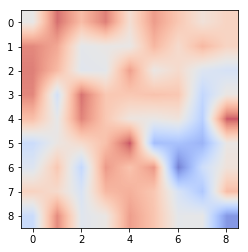

Activation = 0.0003


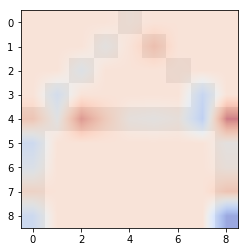

Activation = 0.8710


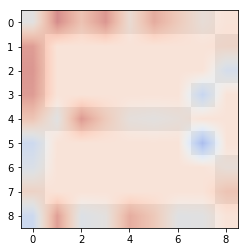

Activation = 0.9669


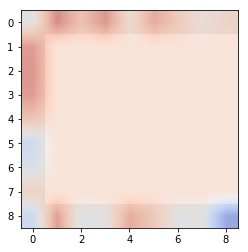

Activation = 0.9934


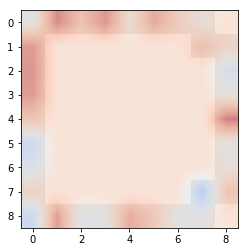

Activation = 0.9750


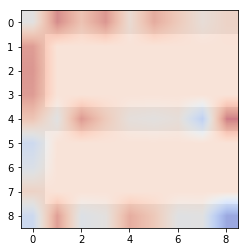

Activation = 0.9965


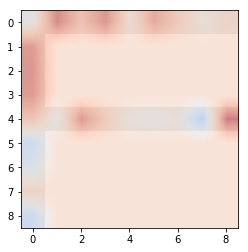

Activation = 0.3571


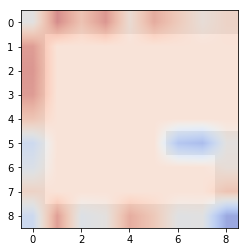

Activation = 0.0624


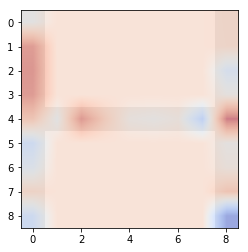

Activation = 0.9975


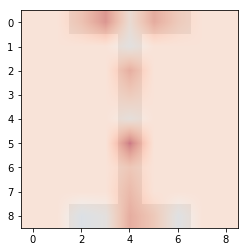

Activation = 0.0007


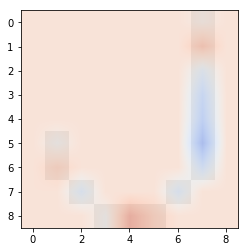

Activation = 0.9905


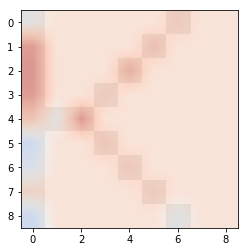

Activation = 0.2335


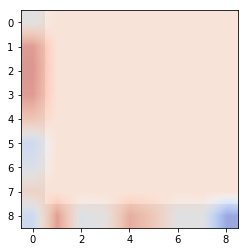

Activation = 0.9960


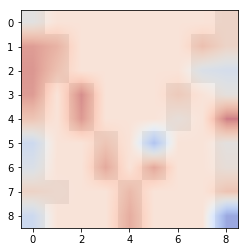

Activation = 0.0007


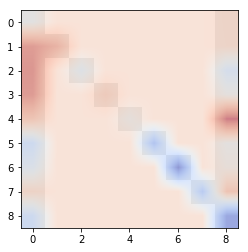

Activation = 0.9999


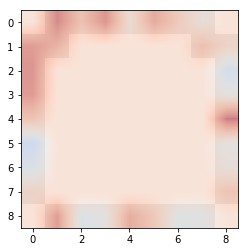

Activation = 0.9882


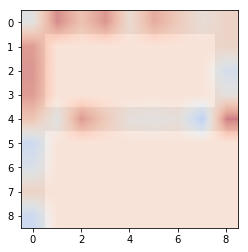

Activation = 0.0694


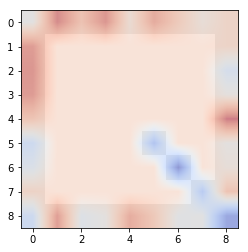

Activation = 0.0137


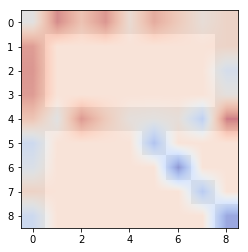

Activation = 0.9944


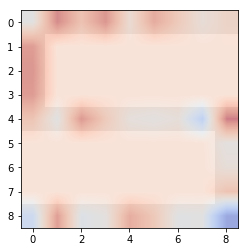

Activation = 0.9998


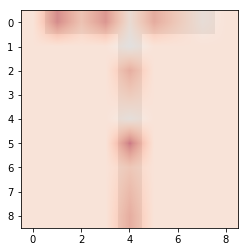

Activation = 0.0012


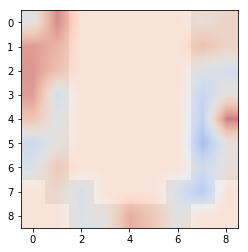

Activation = 0.9949


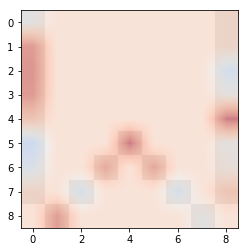

Activation = 0.0000


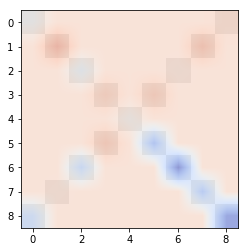

Activation = 0.6131


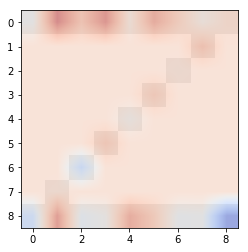

Weights for Node 5


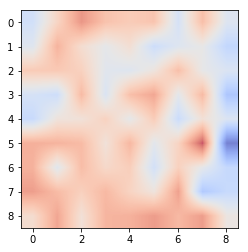

Activation = 0.0007


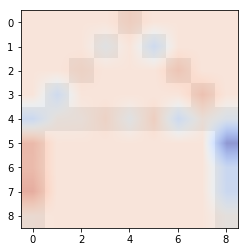

Activation = 0.9918


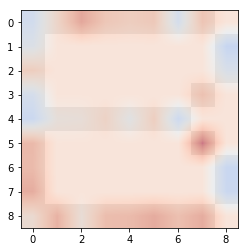

Activation = 0.9994


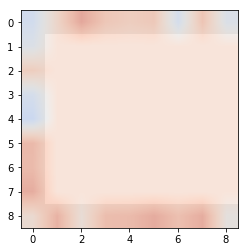

Activation = 0.0140


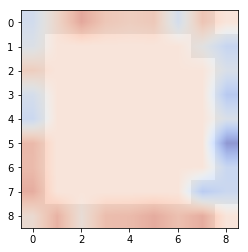

Activation = 0.9906


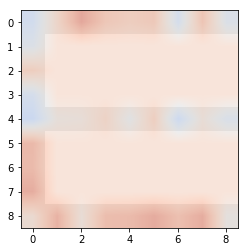

Activation = 0.3224


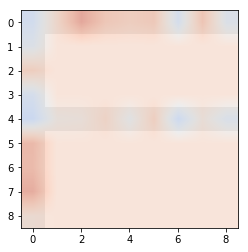

Activation = 0.9807


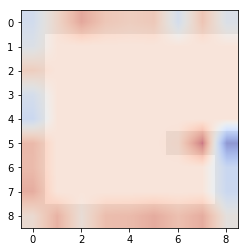

Activation = 0.0000


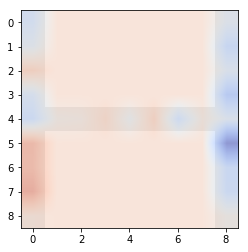

Activation = 0.9987


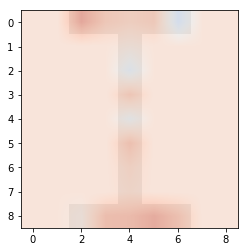

Activation = 0.9991


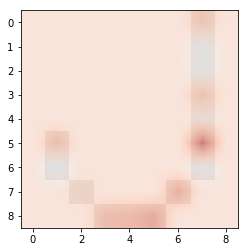

Activation = 0.0277


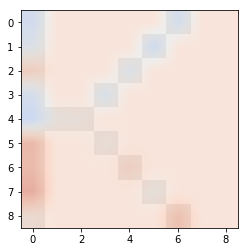

Activation = 0.9962


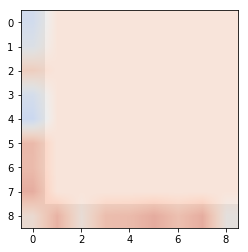

Activation = 0.0000


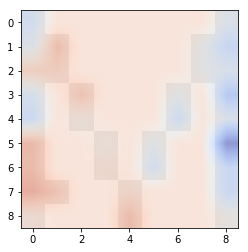

Activation = 0.0000


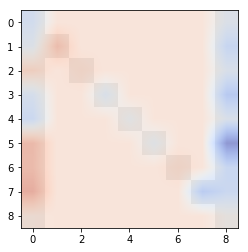

Activation = 0.3665


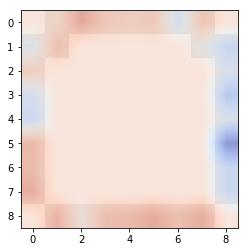

Activation = 0.0083


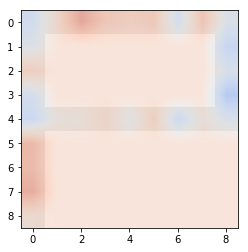

Activation = 0.0050


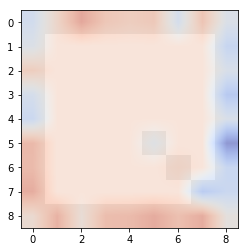

Activation = 0.0007


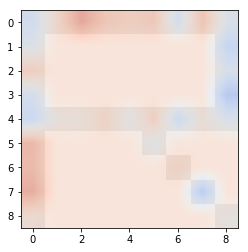

Activation = 0.0172


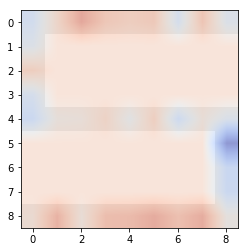

Activation = 0.9917


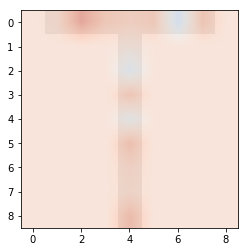

Activation = 0.0046


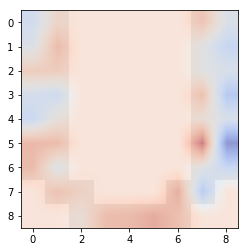

Activation = 0.0005


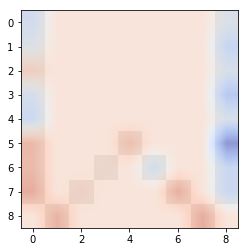

Activation = 0.1749


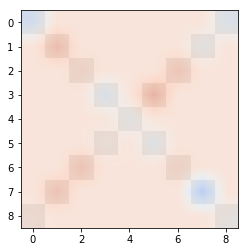

Activation = 0.9998


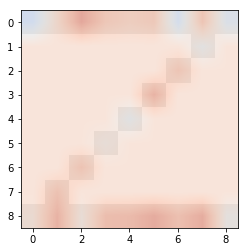

Weights for Node 6


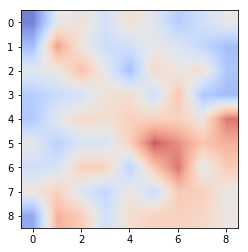

Activation = 0.9993


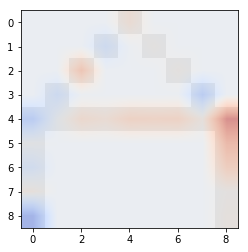

Activation = 0.3345


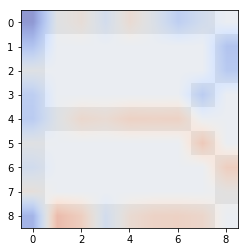

Activation = 0.0422


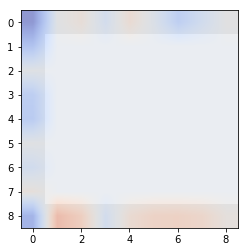

Activation = 0.1322


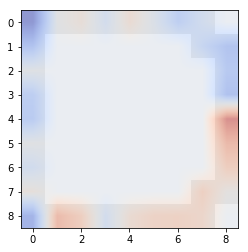

Activation = 0.9802


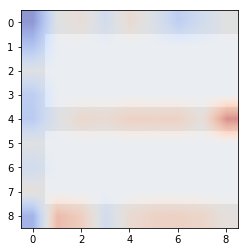

Activation = 0.1237


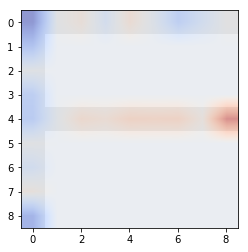

Activation = 0.9675


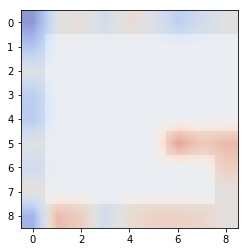

Activation = 0.1322


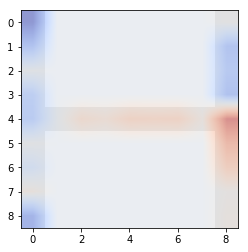

Activation = 0.9401


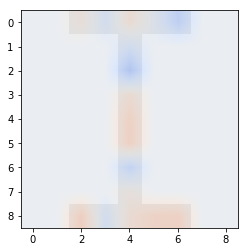

Activation = 0.6539


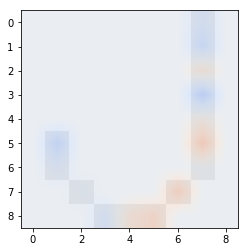

Activation = 0.0000


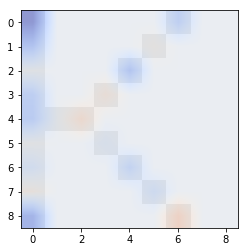

Activation = 0.0894


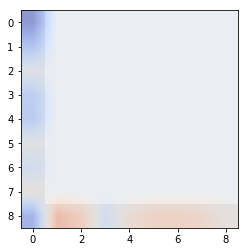

Activation = 0.9929


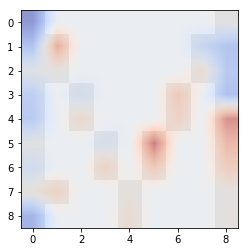

Activation = 0.9937


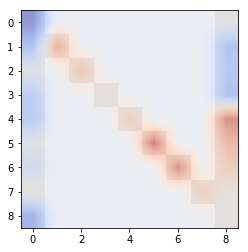

Activation = 0.9734


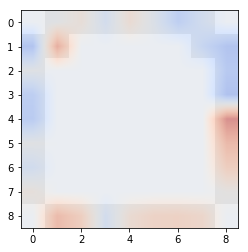

Activation = 0.0022


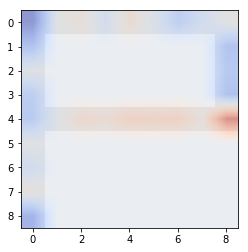

Activation = 0.9925


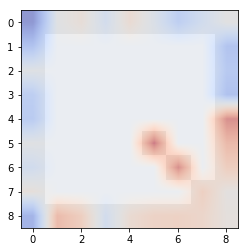

Activation = 0.6772


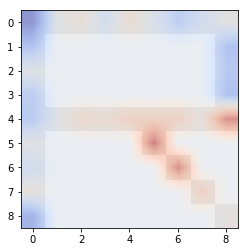

Activation = 0.9991


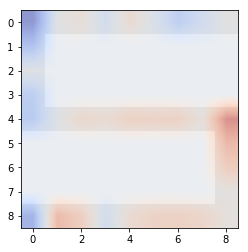

Activation = 0.4559


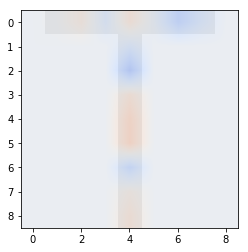

Activation = 0.7170


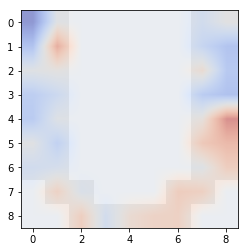

Activation = 0.8694


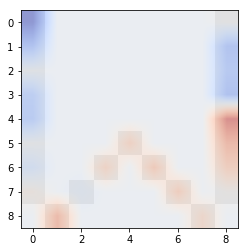

Activation = 0.9997


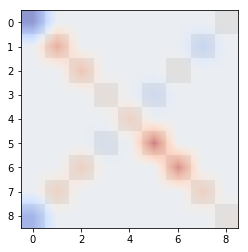

Activation = 0.8988


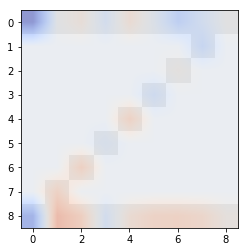

Weights for Node 7


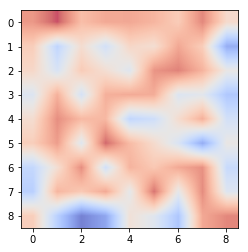

Activation = 0.5407


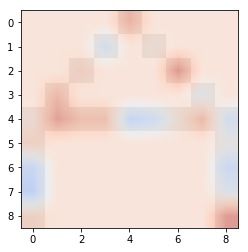

Activation = 0.0010


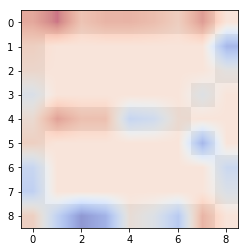

Activation = 0.4841


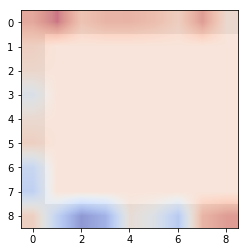

Activation = 0.0024


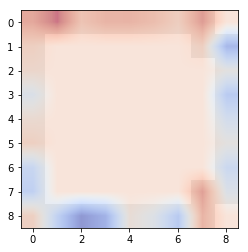

Activation = 0.5101


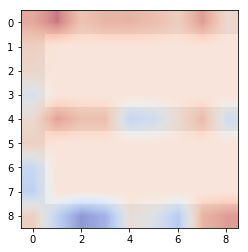

Activation = 0.9963


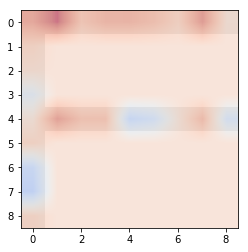

Activation = 0.0120


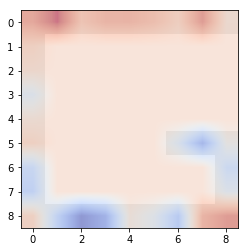

Activation = 0.0147


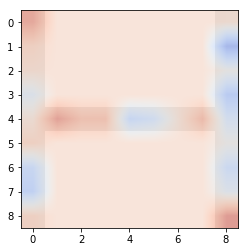

Activation = 0.0852


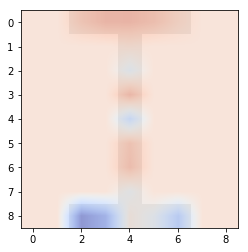

Activation = 0.6602


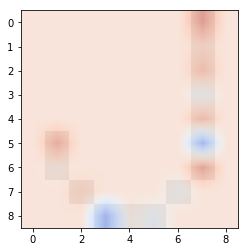

Activation = 0.9793


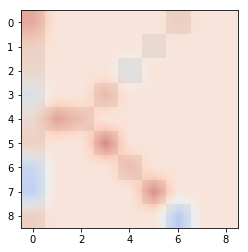

Activation = 0.0036


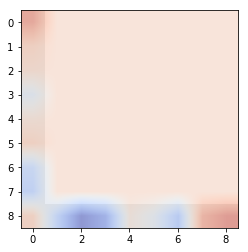

Activation = 0.0026


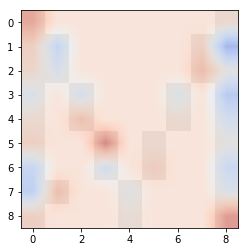

Activation = 0.0115


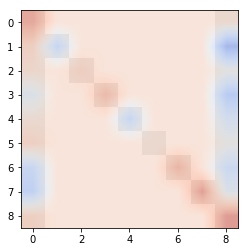

Activation = 0.0001


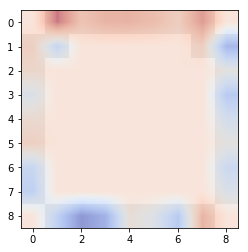

Activation = 0.8927


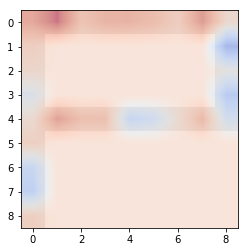

Activation = 0.0123


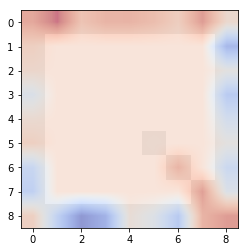

Activation = 0.9939


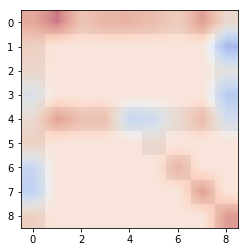

Activation = 0.5363


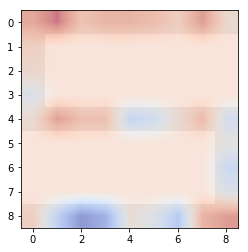

Activation = 0.9984


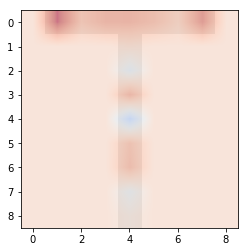

Activation = 0.0035


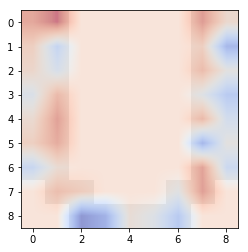

Activation = 0.0009


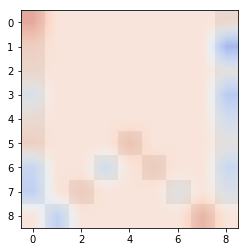

Activation = 0.9999


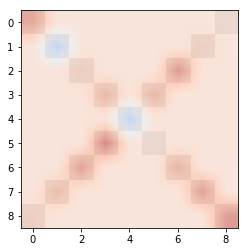

Activation = 0.9985


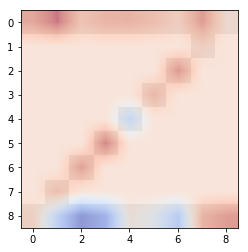

In [11]:
def main():
    

    # Load data
    training_labels, training_data, letters = process_data()

    # Visualize all letters
    display_all(training_data)

    # Train model
    final_model1 = NeuralNet((81, 8, 24)).train(training_data, training_labels)

    # Plot each hidden activation for the letter "N"
    display_influence(training_data[13], final_model1)

    for i in range(0, 8):
        display_node(training_data, final_model1, i)

    # Save table of hidden activations
    hidden_activations(training_data, letters, final_model1).to_csv('hidden.csv')

    return final_model1

if __name__ == '__main__':
    final_model = main()